## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,power_transform

### Importing the test and train dataset

In [2]:
tr_data  = pd.read_csv(r'C:\Users\LENOVO\Documents\Post Graduation\data sets\bigdatamart_Train.csv')
ts_data = pd.read_csv(r'C:\Users\LENOVO\Documents\Post Graduation\data sets\bigdatamart_Test.csv')
print(tr_data.shape,ts_data.shape)

(8523, 12) (5681, 11)


#### Checking for null data

In [3]:
tr_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Imputing null data with median as the data isn't normally distributed

In [4]:
tr_data['Item_Weight'] = tr_data['Item_Weight'].fillna(tr_data['Item_Weight'].median())

In [5]:
tr_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

#### Imputing the outlet size with mode

In [6]:
tr_data['Outlet_Size'] = tr_data['Outlet_Size'].fillna(tr_data['Outlet_Size'].mode()[0])

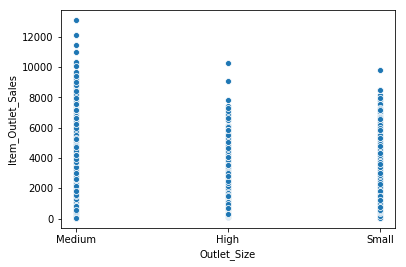

In [7]:
import seaborn as sns
sns.scatterplot(x='Outlet_Size',y = 'Item_Outlet_Sales', data = tr_data)

#### Mediun outlet size has better sales than high and small

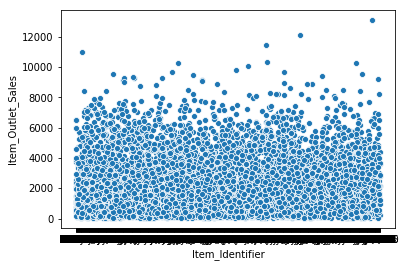

In [8]:
sns.scatterplot(x='Item_Identifier',y = 'Item_Outlet_Sales', data = tr_data)

#### There is no relation between the Iten identifier and the item outlet sales, hence dropping the same

In [9]:
tr_data = tr_data.drop(columns = 'Item_Identifier')

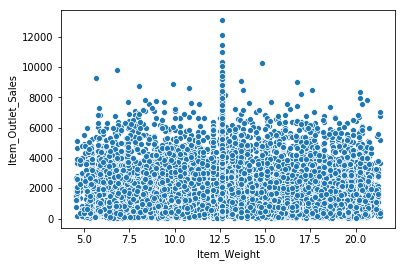

In [10]:
sns.scatterplot(x='Item_Weight',y = 'Item_Outlet_Sales', data = tr_data)

#### No visible relation between the item weight and item sales

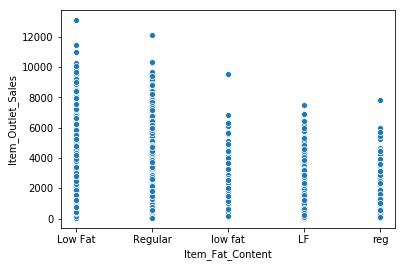

In [11]:
sns.scatterplot(x='Item_Fat_Content',y = 'Item_Outlet_Sales', data = tr_data)

### there are multiple columns with the same meaning like Low Fat, low fat and LF means the same, hence merging them

In [12]:
tr_data['Item_Fat_Content'] = np.where(tr_data['Item_Fat_Content'].isin(['low fat','LF']),'Low Fat',
                                      np.where(tr_data['Item_Fat_Content']== 'reg','Regular',tr_data['Item_Fat_Content']))

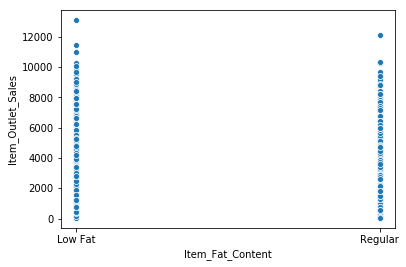

In [13]:
sns.scatterplot(x='Item_Fat_Content',y = 'Item_Outlet_Sales', data = tr_data)

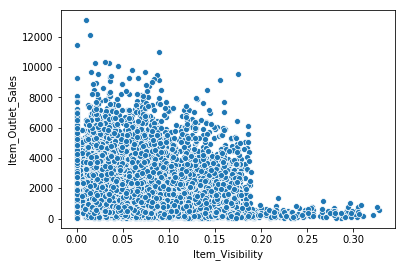

In [14]:
sns.scatterplot(x='Item_Visibility',y = 'Item_Outlet_Sales', data = tr_data)

### No visible relationship between item visibility and sales

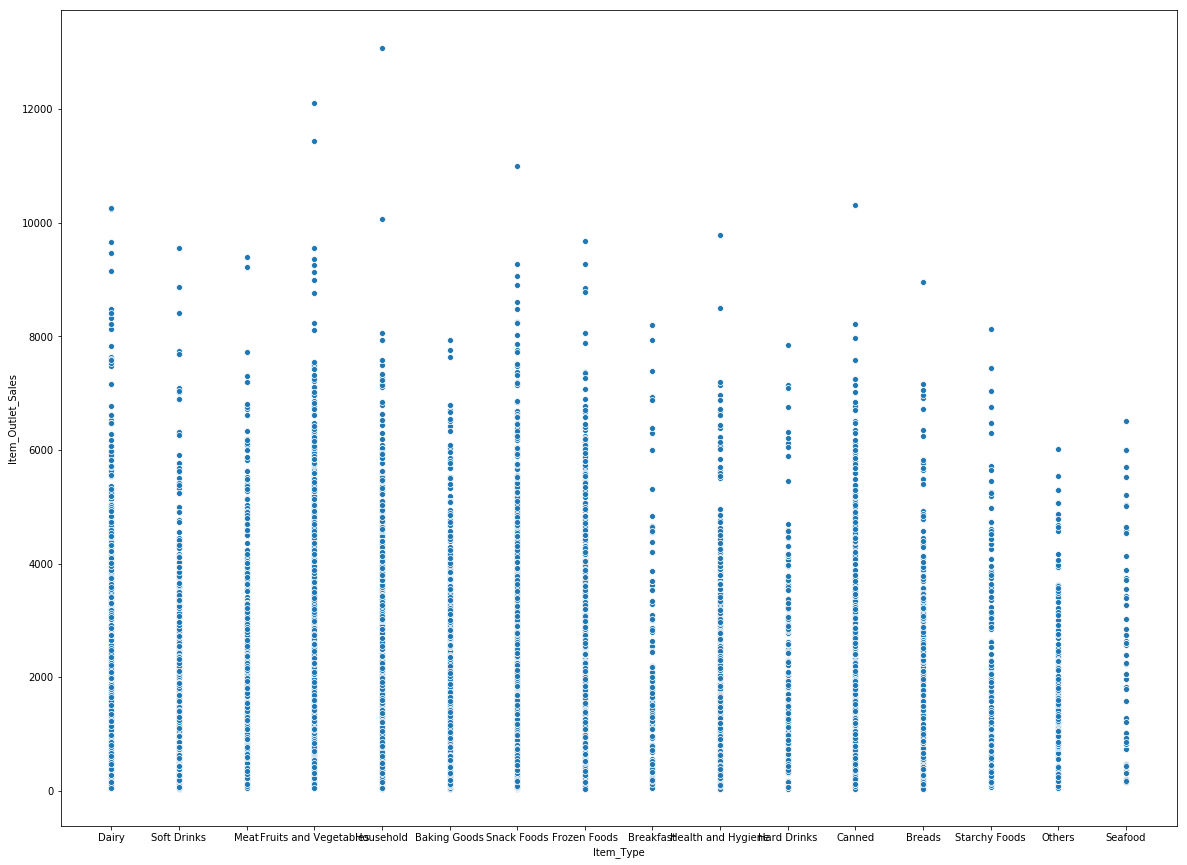

In [15]:
plt.figure(figsize = (20,15))
sns.scatterplot(x='Item_Type',y = 'Item_Outlet_Sales', data = tr_data)

In [16]:
tr_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

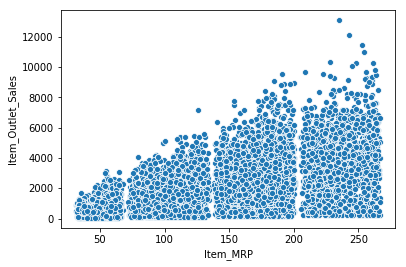

In [17]:
sns.scatterplot(x='Item_MRP',y = 'Item_Outlet_Sales', data = tr_data)

### there is a positive relation ship between the MRP and sales

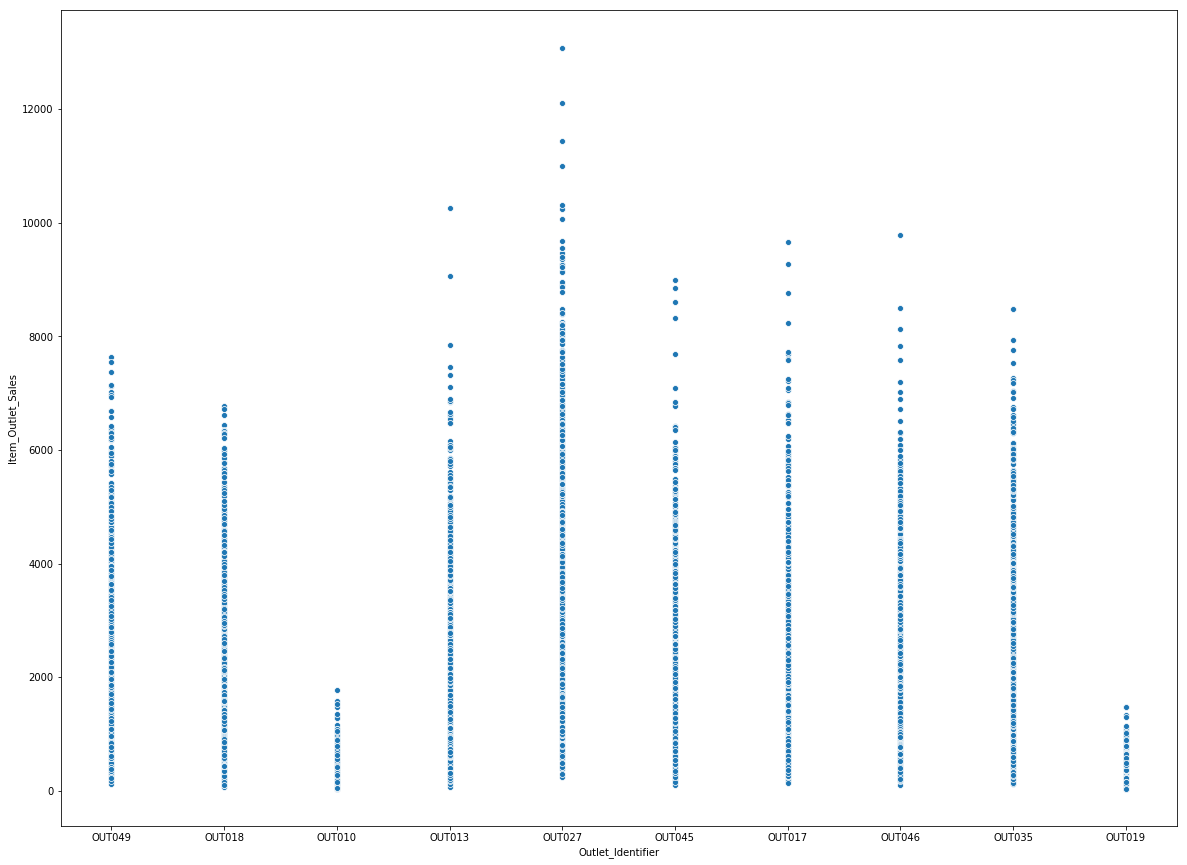

In [18]:
plt.figure(figsize = (20,15))
sns.scatterplot(x='Outlet_Identifier',y = 'Item_Outlet_Sales', data = tr_data)

<BarContainer object of 8523 artists>

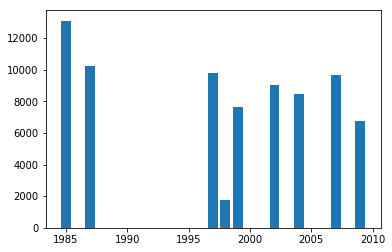

In [19]:
plt.bar(tr_data['Outlet_Establishment_Year'],tr_data['Item_Outlet_Sales'])

### Minore relationship between the outlet established year and sales. the older the store the better the sales

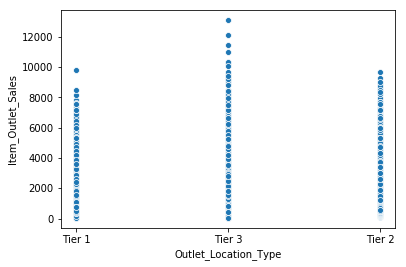

In [20]:
sns.scatterplot(x='Outlet_Location_Type',y = 'Item_Outlet_Sales', data = tr_data)

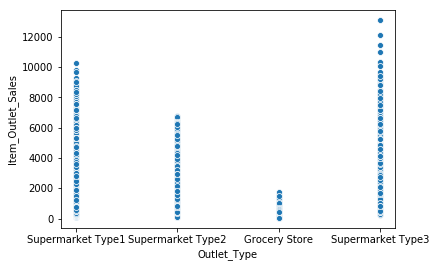

In [21]:
sns.scatterplot(x='Outlet_Type',y = 'Item_Outlet_Sales', data = tr_data)

In [22]:
tr_data['Outlet_Establishment_Year'] = tr_data['Outlet_Establishment_Year'].astype(str)

#### Encoding the categorical variables as per the data. below I'm encoding the outlet size using ordinal encoder

In [23]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder
orde = OrdinalEncoder(categories = [['Small','Medium','High']])
ord_data = orde.fit_transform(tr_data[['Outlet_Size']])
tr_data['Outlet_Size'] = ord_data

In [24]:
be =BinaryEncoder()

#### Using binary encode to encode other categorical data

In [25]:
en_data = be.fit_transform(tr_data[['Outlet_Type','Outlet_Location_Type',
                                        'Item_Fat_Content','Outlet_Establishment_Year','Outlet_Identifier','Item_Type']],)

In [26]:
train_data = pd.DataFrame(en_data)

### I'm dropping the categorical variable and replacing with the same with the encoded data

In [27]:
tr_data = tr_data.drop(columns =['Outlet_Type','Outlet_Location_Type',
                                        'Item_Fat_Content','Outlet_Establishment_Year','Outlet_Identifier','Item_Type'])

In [28]:
train_data = pd.concat([tr_data,train_data],axis = 1)

In [29]:
train_corr =  train_data.corr()
train_corr['Item_Outlet_Sales'].sort_values(ascending = False)

Item_Outlet_Sales              1.000000
Item_MRP                       0.567574
Outlet_Type_0                  0.311192
Outlet_Identifier_2            0.233183
Outlet_Identifier_4            0.128529
Outlet_Location_Type_1         0.111287
Outlet_Establishment_Year_2    0.097637
Outlet_Size                    0.086182
Outlet_Establishment_Year_1    0.054821
Item_Type_2                    0.026824
Item_Type_4                    0.021672
Item_Fat_Content_0             0.018719
Item_Weight                    0.009693
Item_Type_0                    0.007380
Outlet_Establishment_Year_4   -0.005184
Item_Type_1                   -0.018475
Item_Fat_Content_1            -0.018719
Item_Type_3                   -0.032201
Outlet_Location_Type_2        -0.046376
Outlet_Identifier_1           -0.098403
Item_Visibility               -0.128625
Outlet_Establishment_Year_3   -0.146047
Outlet_Type_2                 -0.206633
Outlet_Identifier_3           -0.277444
Outlet_Type_1                 -0.350879


## Checkin for correlation, where the column Item_MRP shows the highest positive correlation and the column Outlet_Establishment_Year_4 has the lowest correlation (close to 0)

In [30]:
train_data = train_data.drop(columns =['Outlet_Location_Type_0','Outlet_Establishment_Year_0','Outlet_Identifier_0'])

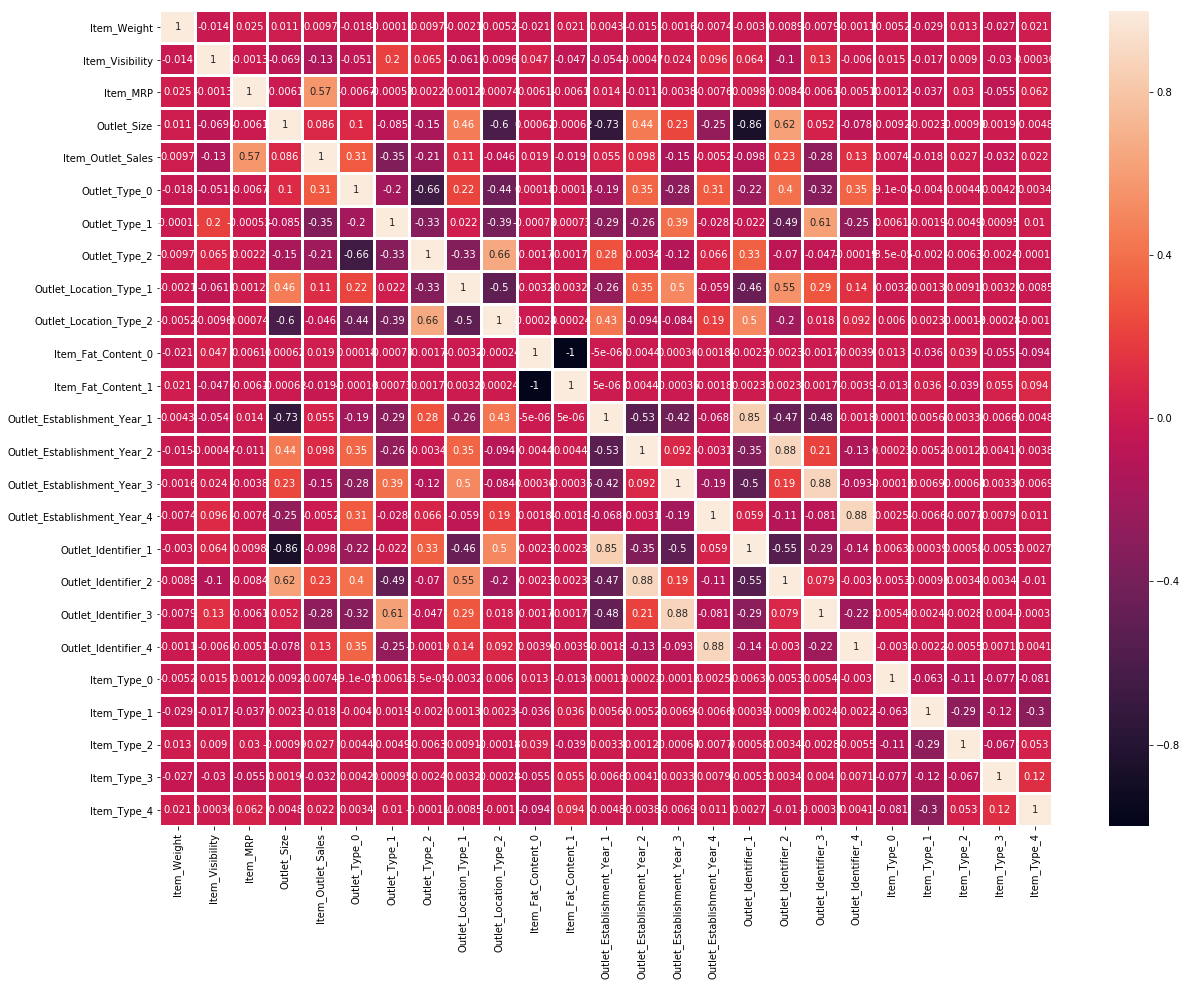

In [31]:
train_corr =  train_data.corr()
plt.figure(figsize = (20,15))
sns.heatmap(train_corr, annot = True, linewidths=2)

### There is no multi collinearity problem with the data

## There is outlier with item_visibility column as per the below plot

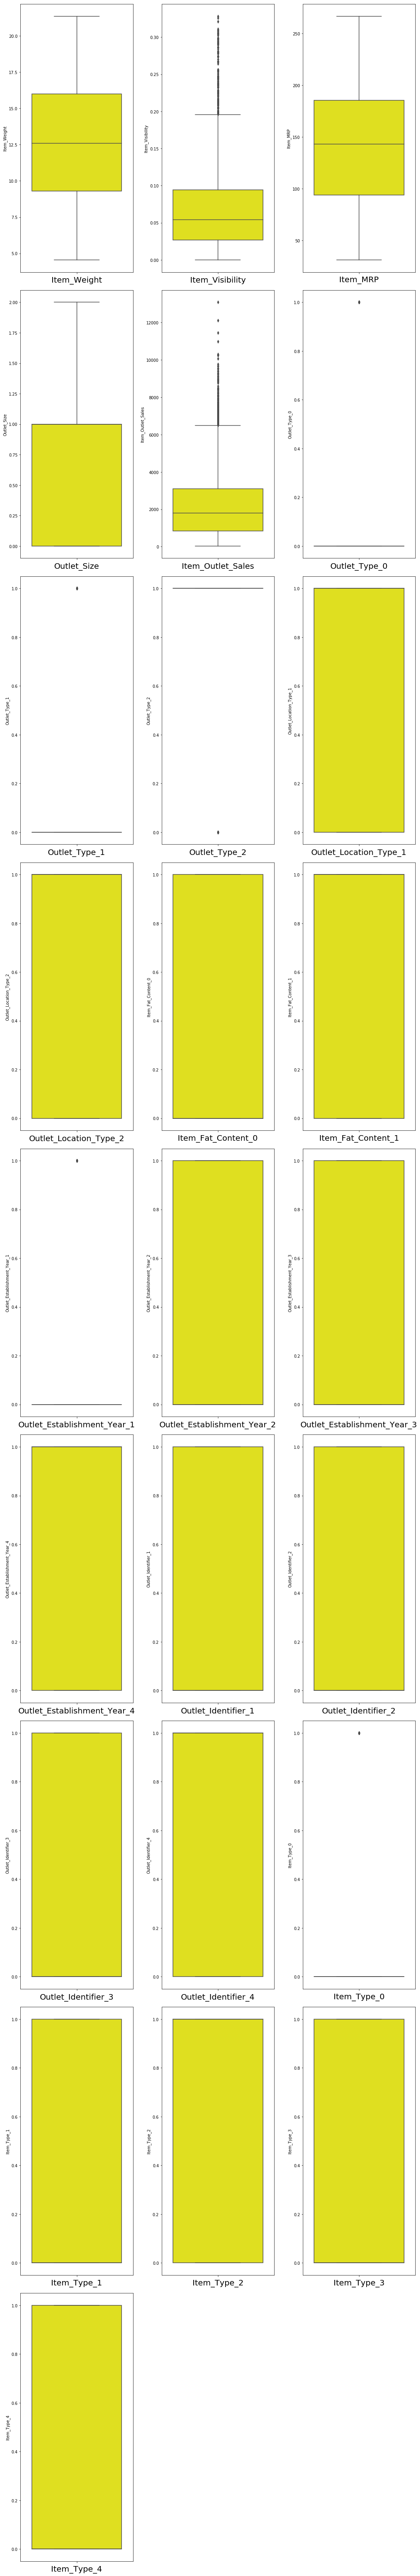

In [32]:
plt.figure(figsize = (15,90))
pltnum = 1

for i in train_data:
    if pltnum <= 27:
        plt.subplot(9,3,pltnum)
        sns.boxplot(train_data[i],color = 'yellow', orient = 'v')
        plt.xlabel(i,fontsize = 20)
    pltnum+=1
plt.tight_layout()


In [33]:
from scipy.stats import zscore
z = np.abs(zscore(train_data[['Item_Visibility']]))
z

array([[0.97073217],
       [0.90811123],
       [0.95691733],
       ...,
       [0.59978449],
       [1.53287976],
       [0.41193591]])

### Removing the outlier using the z-score method. removing data with z-score greater than 3

In [34]:
ds_new = train_data[(z<3).all(axis =1)]
print(ds_new.shape)
print(train_data.shape)

(8428, 25)
(8523, 25)


In [35]:
(8428/8523)*100

98.88536900152528

### Checking for skewness in the continuos data

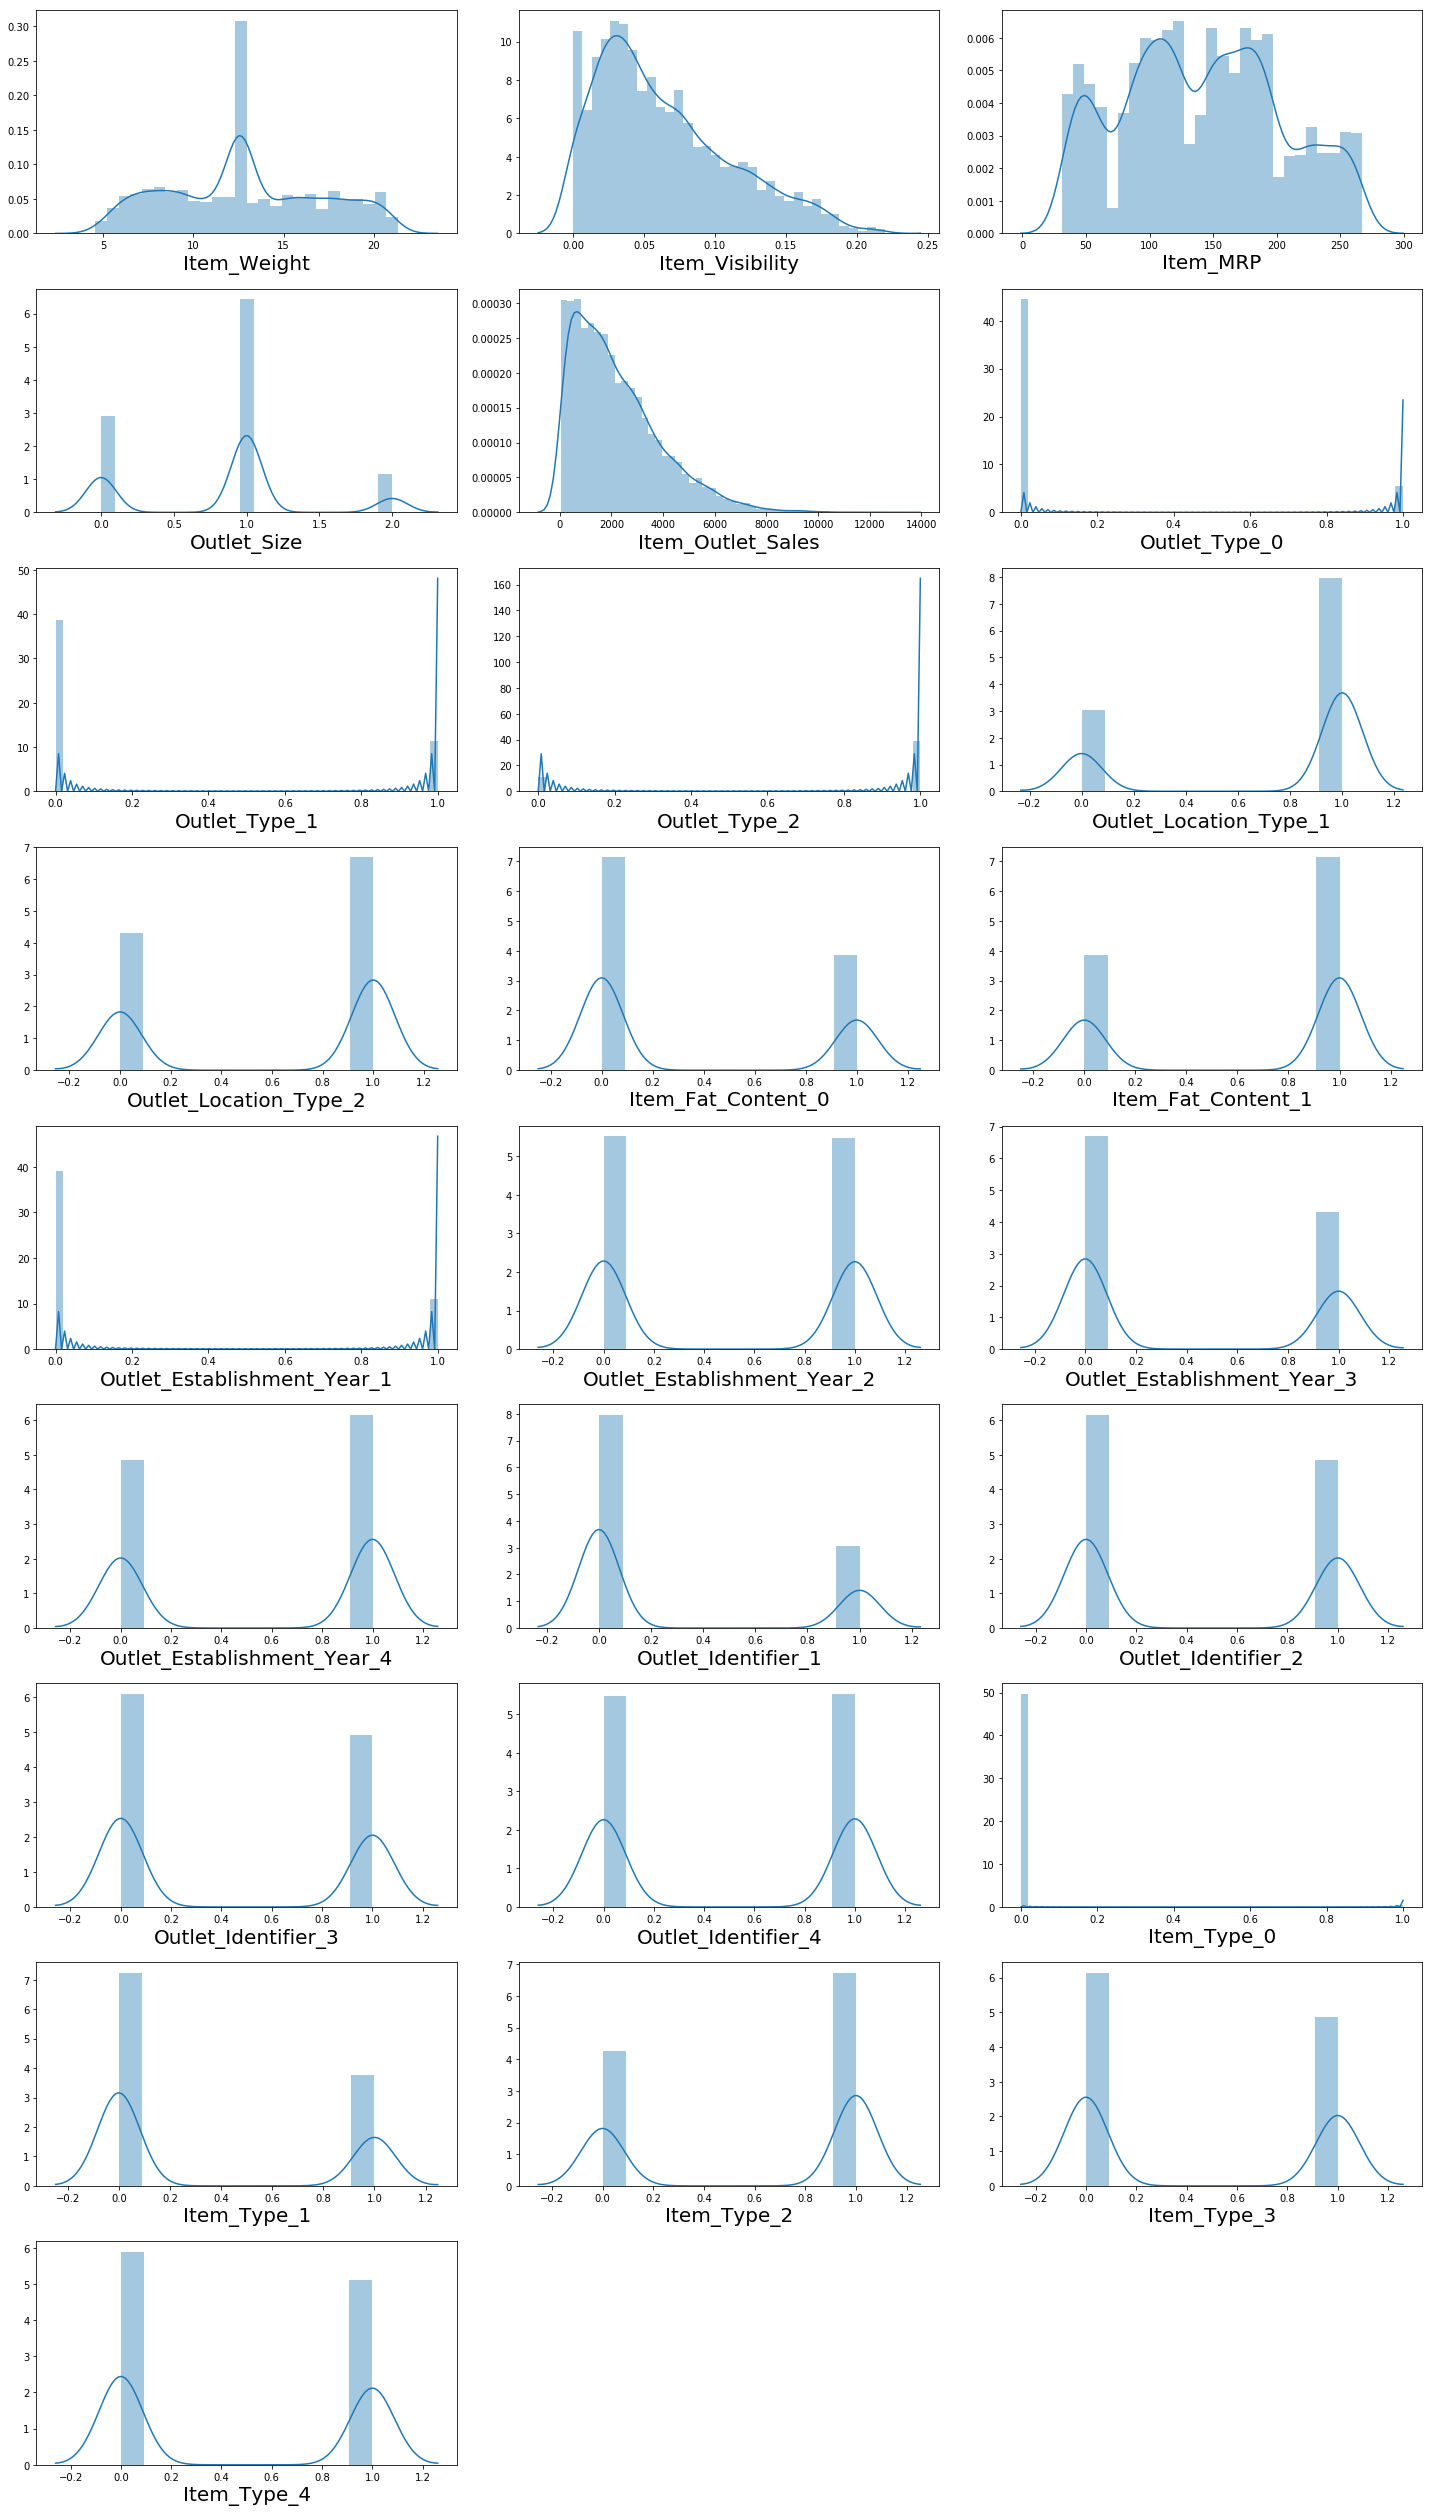

In [36]:
plt.figure(figsize = (20,35))
pltnum = 1

for i in ds_new:
    if pltnum <= 27:
        plt.subplot(9,3,pltnum)
        sns.distplot(ds_new[i])
        plt.xlabel(i,fontsize = 20)
    pltnum+=1
plt.tight_layout()

#### Treating skewness greater than the range -0.5 to +0.5 in continuous data using power transformation technique

In [37]:
ds_new.skew()

Item_Weight                     0.120308
Item_Visibility                 0.795956
Item_MRP                        0.128945
Outlet_Size                     0.082879
Item_Outlet_Sales               1.173070
Outlet_Type_0                   2.478078
Outlet_Type_1                   1.301375
Outlet_Type_2                  -1.344733
Outlet_Location_Type_1         -0.996495
Outlet_Location_Type_2         -0.440370
Item_Fat_Content_0              0.620786
Item_Fat_Content_1             -0.620786
Outlet_Establishment_Year_1     1.347227
Outlet_Establishment_Year_2     0.008070
Outlet_Establishment_Year_3     0.446491
Outlet_Establishment_Year_4    -0.236611
Outlet_Identifier_1             0.996495
Outlet_Identifier_2             0.235157
Outlet_Identifier_3             0.211461
Outlet_Identifier_4            -0.009494
Item_Type_0                    11.628386
Item_Type_1                     0.663128
Item_Type_2                    -0.456720
Item_Type_3                     0.231766
Item_Type_4     

#### Splitting data to apply transformation only on independent variable

In [38]:
x = train_data.drop(columns = 'Item_Outlet_Sales')
y = train_data['Item_Outlet_Sales']

In [39]:
tr_data = power_transform(x, method = 'yeo-johnson')
x = pd.DataFrame(tr_data, columns = x.columns)

In [40]:
x.skew()

Item_Weight                    -0.062510
Item_Visibility                 0.124279
Item_MRP                       -0.115386
Outlet_Size                    -0.073203
Outlet_Type_0                   2.498184
Outlet_Type_1                   1.244005
Outlet_Type_2                  -1.362080
Outlet_Location_Type_1         -0.979119
Outlet_Location_Type_2         -0.437995
Item_Fat_Content_0              0.616705
Item_Fat_Content_1             -0.616705
Outlet_Establishment_Year_1     1.364576
Outlet_Establishment_Year_2     0.005398
Outlet_Establishment_Year_3     0.444044
Outlet_Establishment_Year_4    -0.256739
Outlet_Identifier_1             0.979119
Outlet_Identifier_2             0.255296
Outlet_Identifier_3             0.186453
Outlet_Identifier_4            -0.006806
Item_Type_0                    11.411629
Item_Type_1                     0.665078
Item_Type_2                    -0.455163
Item_Type_3                     0.232739
Item_Type_4                     0.141407
dtype: float64

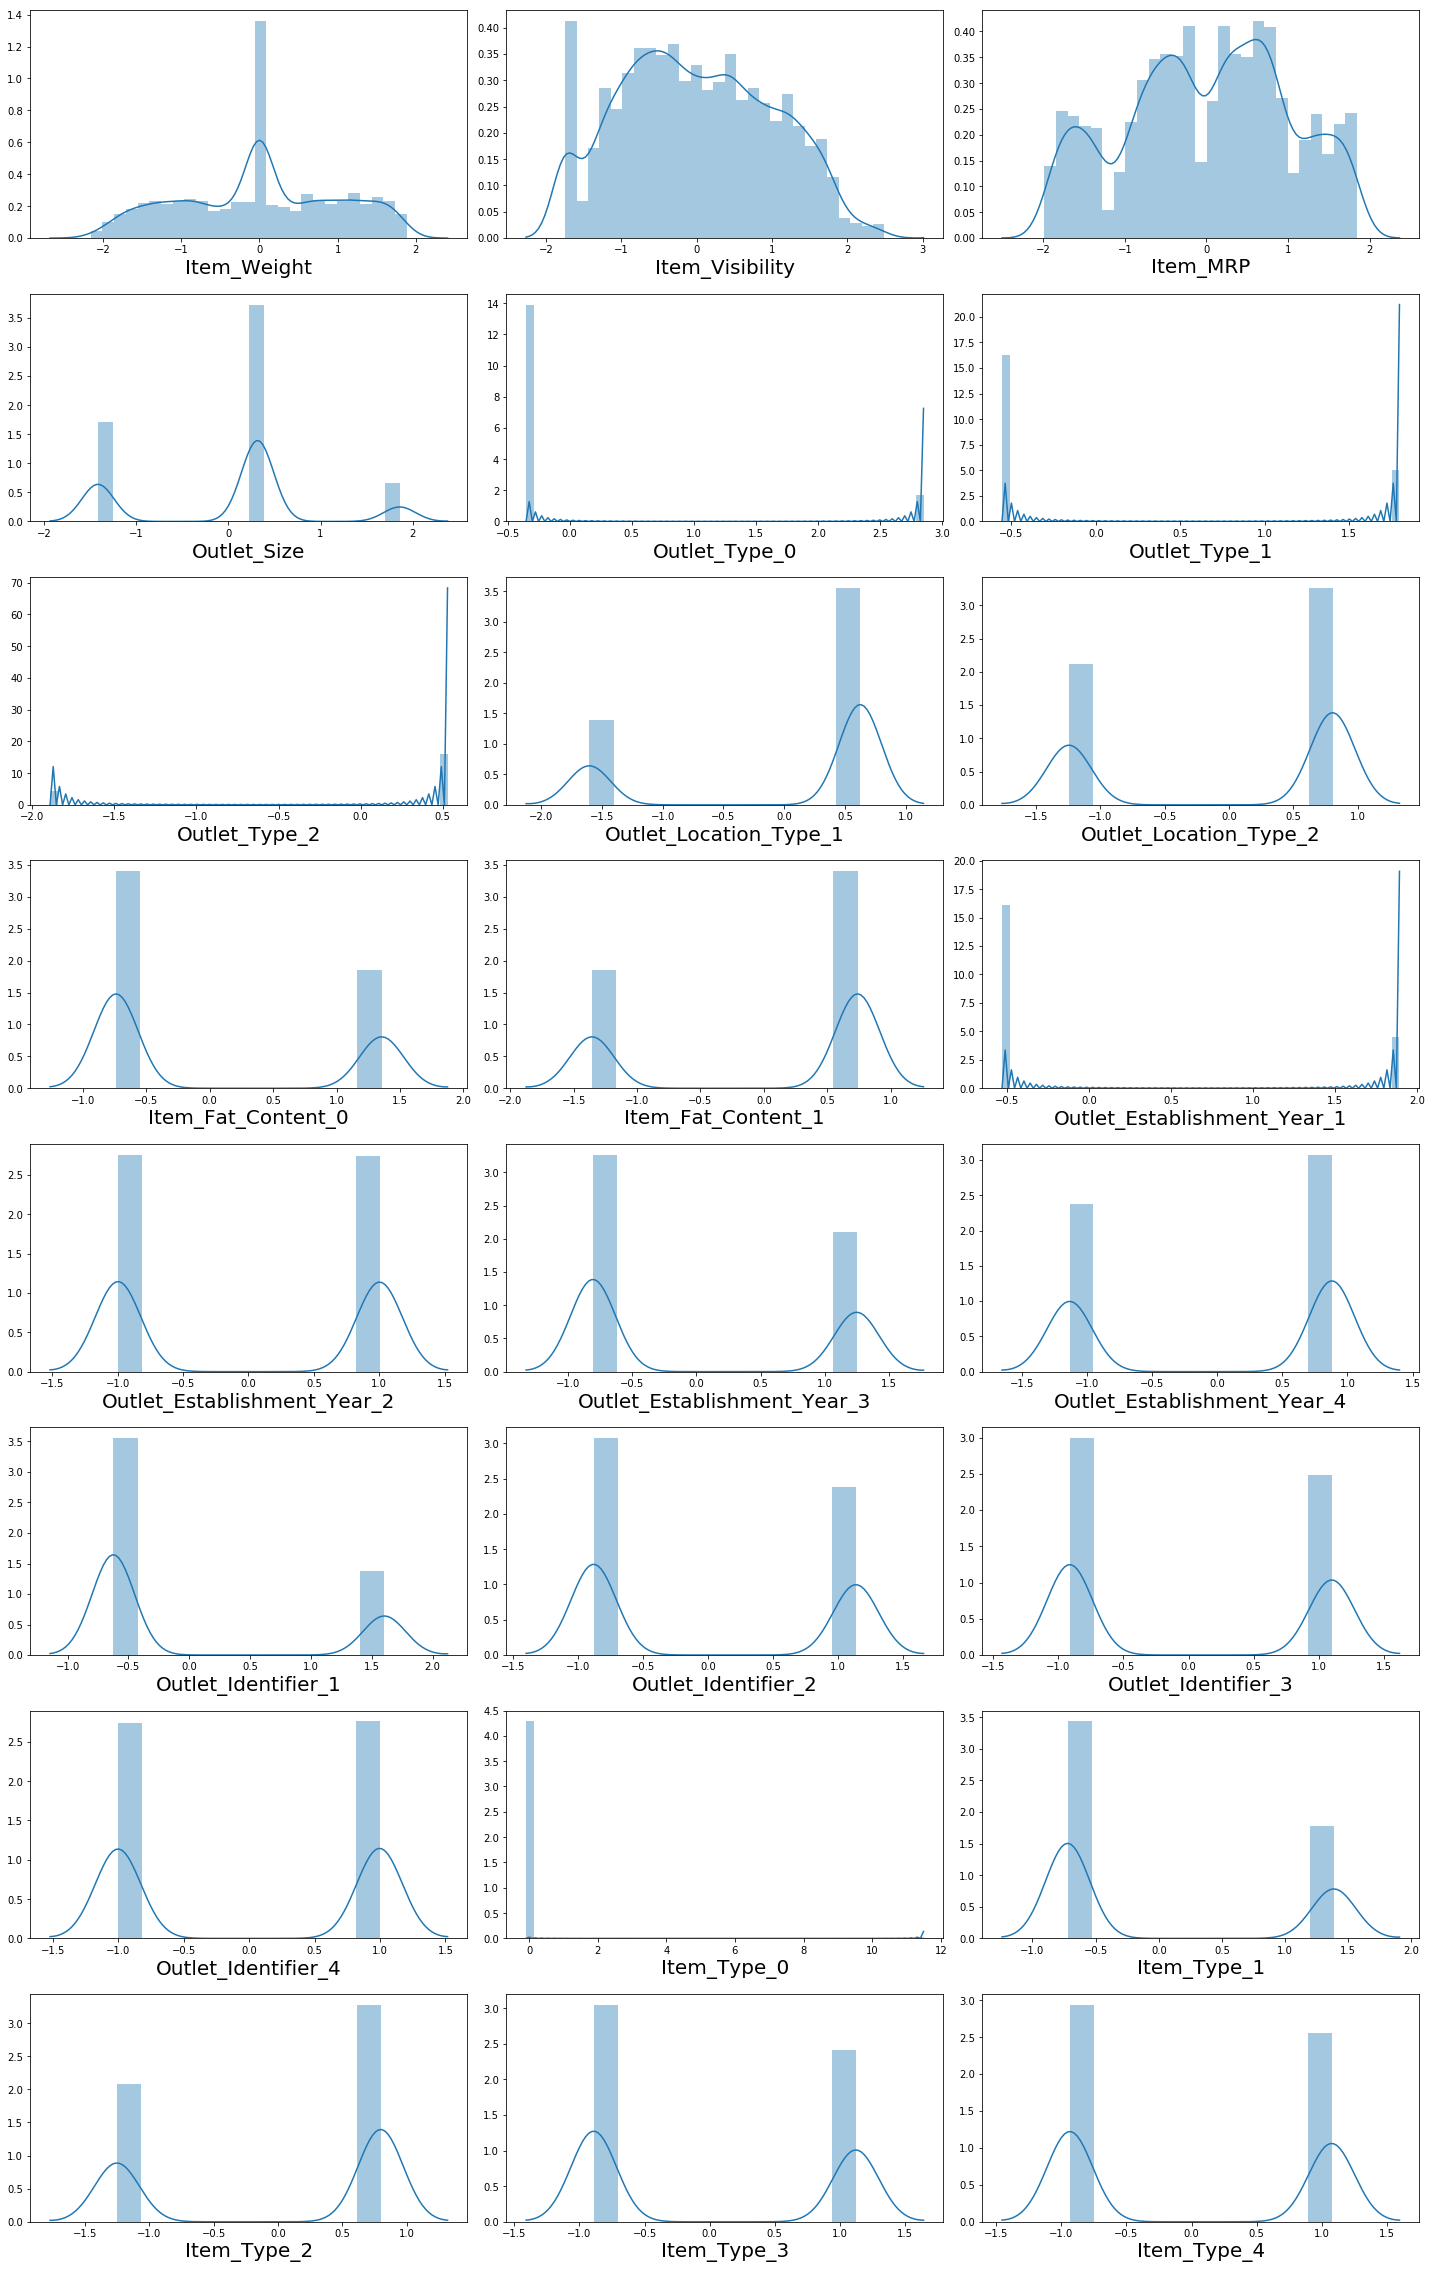

In [41]:
plt.figure(figsize = (20,35))
pltnum = 1

for i in x:
    if pltnum <= 27:
        plt.subplot(9,3,pltnum)
        sns.distplot(x[i])
        plt.xlabel(i,fontsize = 20)
    pltnum+=1
plt.tight_layout()

## The Skewness and outliers are under control, as per the given figures

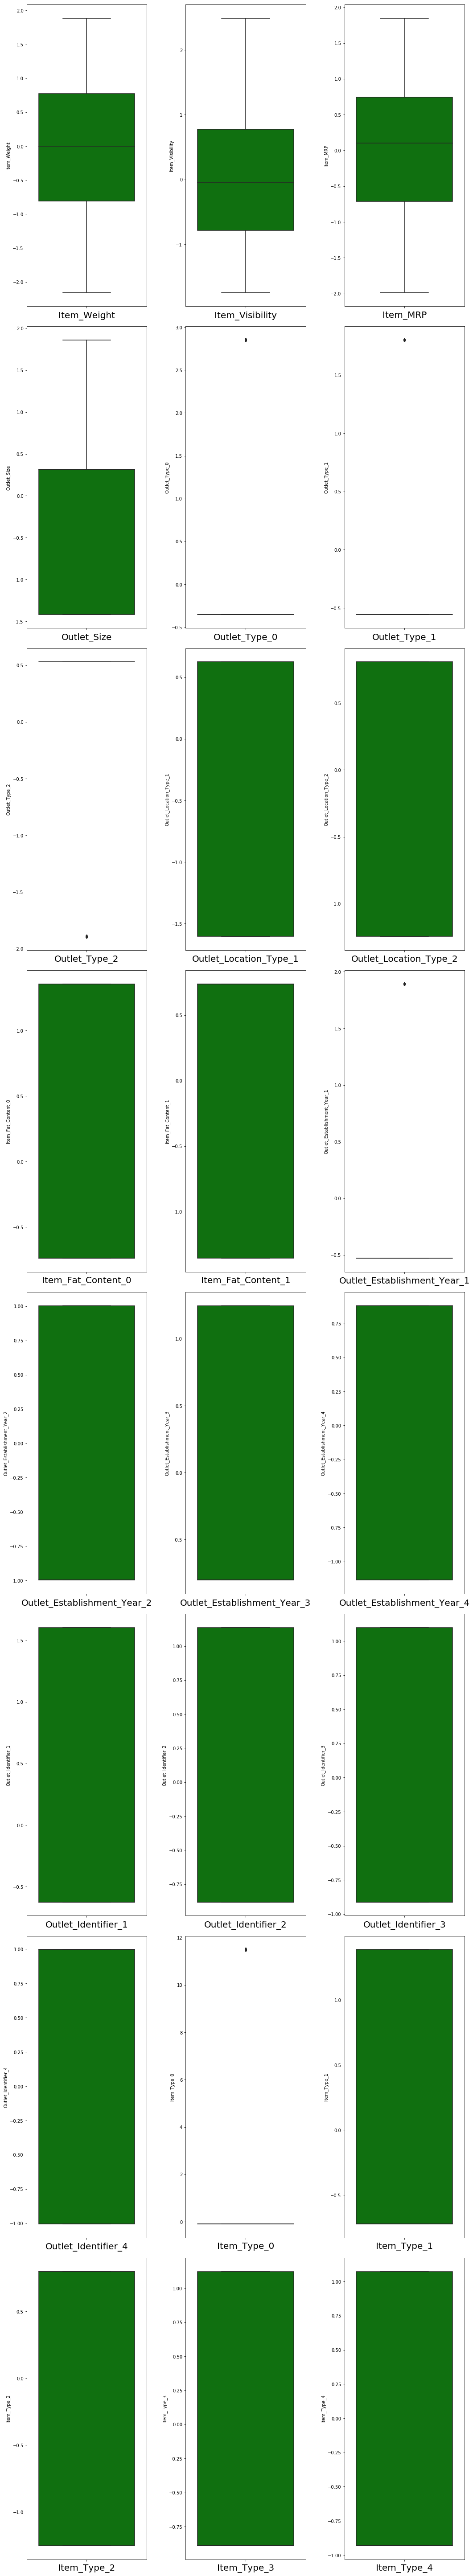

In [42]:
plt.figure(figsize = (15,90))
pltnum = 1

for i in x:
    if pltnum <= 27:
        plt.subplot(9,3,pltnum)
        sns.boxplot(x[i],color = 'green', orient = 'v')
        plt.xlabel(i,fontsize = 20)
    pltnum+=1
plt.tight_layout()

### Since the model was not performing well, hence dropping variables with correlation close to 0

In [43]:
"""
Item_Fat_Content_0             0.018719
Item_Weight                    0.009693
Item_Type_0                    0.007380
Outlet_Establishment_Year_4   -0.005184
Item_Type_1                   -0.018475
Item_Fat_Content_1            -0.018719
"""
x = x.drop(columns = ['Item_Weight','Item_Type_0','Outlet_Establishment_Year_4','Item_Type_1','Item_Fat_Content_1','Item_Fat_Content_0'])

## Finding best random state

In [44]:
from sklearn.linear_model import LinearRegression
for i in range(1,3000):
    lr = LinearRegression()
    x_train,x_val,y_train,y_val = train_test_split(x,y,random_state = i)
    lr.fit(x_train,y_train)
    lr_pred = lr.predict(x_val)
    tr_score = lr.score(x_train,y_train)
    ts_score = lr.score(x_val,y_val)
    if round(tr_score*100,1)==round(ts_score*100,1):
        rs = i
print('The best random state is', rs)

The best random state is 2996


### Model 1 Linear Regression

In [82]:
x_train,x_val,y_train,y_val = train_test_split(x,y,random_state = rs)
lin = LinearRegression()
lin.fit(x_train,y_train)
lin_pred = lin.predict(x_val)
lin_score = lin.score (x_val,y_val)
lin_score

0.5610787525553969

In [46]:
from sklearn.metrics import mean_squared_error
lin_rmse = np.sqrt(mean_squared_error(y_val,lin_pred))
lin_rmse

1147.5102104465075

### Model 2 Random Forest Regression

In [47]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred =rfr.predict(x_val)
rfr_score = rfr.score(x_val,y_val)
rfr_score

0.5524880744724214

In [48]:
rfr_rmse = np.sqrt(mean_squared_error(y_val,rfr_pred))
rfr_rmse

1158.6854747187547

### Model 3 Extra trees Regression

In [49]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred = et.predict(x_val)
et_score = et.score(x_val,y_val)
et_score

0.5049877566692846

In [50]:
et_rmse = np.sqrt(mean_squared_error(y_val,et_pred))
et_rmse

1218.6282073916298

In [51]:
from sklearn.linear_model import Ridge, Lasso

### Ridge Regressor

In [52]:
ridge = Ridge()
ridge.fit(x_train,y_train)
rid_pred = ridge.predict(x_val)
rid_score = ridge.score (x_val,y_val)
rid_score

0.5616908262518268

In [53]:
rid_rmse = np.sqrt(mean_squared_error(y_val,rid_pred))
rid_rmse

1146.7098324163794

### lasso Regression

In [54]:
lasso = Lasso(max_iter = 1000)
lasso.fit(x_train,y_train)
las_pred = lasso.predict(x_val)
las_score = lasso.score (x_val,y_val)
las_score

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18841050.636244774, tolerance: 1841941.4210720765
  positive)


0.5619286446059639

In [55]:
las_rmse = np.sqrt(mean_squared_error(y_val,las_pred))
las_rmse

1146.398698560366

### using cross validation technique on each model

In [56]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(lin,x,y,scoring ='r2',cv=7)
cv =cv.mean()
cv

0.5598862336794239

In [57]:
cv1 = cross_val_score(rfr,x,y,scoring ='r2',cv=7)
cv1 =cv1.mean()
cv1

0.5565522343356164

In [58]:
cv2 = cross_val_score(et,x,y,scoring ='r2',cv=7)
cv2 =cv2.mean()
cv2

0.4899164646994932

In [59]:
cv3 = cross_val_score(ridge,x,y,scoring ='r2',cv=7)
cv3 =cv3.mean()
cv3

0.5601121831804244

In [60]:
cv4 = cross_val_score(lasso,x,y,scoring ='r2',cv=7)
cv4 =cv4.mean()
cv4

0.5601527305997512

### Linear Regression is the best model and there is no hyper parameter tuning required hence finalizing the same model

In [61]:
mod = [lin_score,rfr_score,et_score,rid_score,las_score]
cv = [cv,cv1,cv2,cv3,cv4]
model = pd.DataFrame({})
model['mod'] = mod
model['cv'] =cv
model['best'] = model['mod'] - model['cv']
model

,mod,cv,best
0,0.561079,0.559886,0.001193
1,0.552488,0.556552,-0.004064
2,0.504988,0.489916,0.015071
3,0.561691,0.560112,0.001579
4,0.561929,0.560153,0.001776


### Saving the model

In [62]:
import joblib
joblib.dump(lin,'SalesMart.pkl')

['SalesMart.pkl']

## Fitting the test data and cleaing the data with same approach

In [63]:
ts_data['Item_Weight'] = ts_data['Item_Weight'].fillna(ts_data['Item_Weight'].median())
ts_data['Outlet_Size'] = ts_data['Outlet_Size'].fillna(ts_data['Outlet_Size'].mode()[0])

In [64]:
ts_data = ts_data.drop(columns = 'Item_Identifier')

In [65]:
ordin = OrdinalEncoder(categories = [['Small','Medium','High']])
ord_data = ordin.fit_transform(ts_data[['Outlet_Size']])
ts_data['Outlet_Size'] = ord_data

In [66]:
ts_data['Item_Fat_Content'] = np.where(ts_data['Item_Fat_Content'].isin(['low fat','LF']),'Low Fat',
                                      np.where(ts_data['Item_Fat_Content']== 'reg','Regular',ts_data['Item_Fat_Content']))

In [67]:
ts_data['Outlet_Establishment_Year'] = ts_data['Outlet_Establishment_Year'].astype(str)

In [68]:
en_test_data = be.fit_transform(ts_data[['Outlet_Type','Outlet_Location_Type',
                                        'Item_Fat_Content','Outlet_Establishment_Year','Outlet_Identifier','Item_Type']],)

In [69]:
test_data = pd.DataFrame(en_test_data)

In [70]:
ts_data = ts_data.drop(columns =['Outlet_Type','Outlet_Location_Type',
                                        'Item_Fat_Content','Outlet_Establishment_Year','Outlet_Identifier','Item_Type'])

In [71]:
test_data = pd.concat([ts_data,test_data],axis = 1)

In [72]:
test_data = test_data.drop(columns =['Outlet_Location_Type_0','Outlet_Establishment_Year_0','Outlet_Identifier_0'])

In [73]:
from scipy.stats import zscore
zt = np.abs(zscore(test_data[['Item_Visibility']]))
zt

array([[1.13407715],
       [0.53185019],
       [0.6613164 ],
       ...,
       [0.15307374],
       [1.28168987],
       [0.76171558]])

In [74]:
ts_new = test_data[(zt<3).all(axis =1)]
print(ts_new.shape)
print(test_data.shape)

(5600, 24)
(5681, 24)


In [75]:
ts_new.dtypes

Item_Weight                    float64
Item_Visibility                float64
Item_MRP                       float64
Outlet_Size                    float64
Outlet_Type_0                    int64
Outlet_Type_1                    int64
Outlet_Type_2                    int64
Outlet_Location_Type_1           int64
Outlet_Location_Type_2           int64
Item_Fat_Content_0               int64
Item_Fat_Content_1               int64
Outlet_Establishment_Year_1      int64
Outlet_Establishment_Year_2      int64
Outlet_Establishment_Year_3      int64
Outlet_Establishment_Year_4      int64
Outlet_Identifier_1              int64
Outlet_Identifier_2              int64
Outlet_Identifier_3              int64
Outlet_Identifier_4              int64
Item_Type_0                      int64
Item_Type_1                      int64
Item_Type_2                      int64
Item_Type_3                      int64
Item_Type_4                      int64
dtype: object

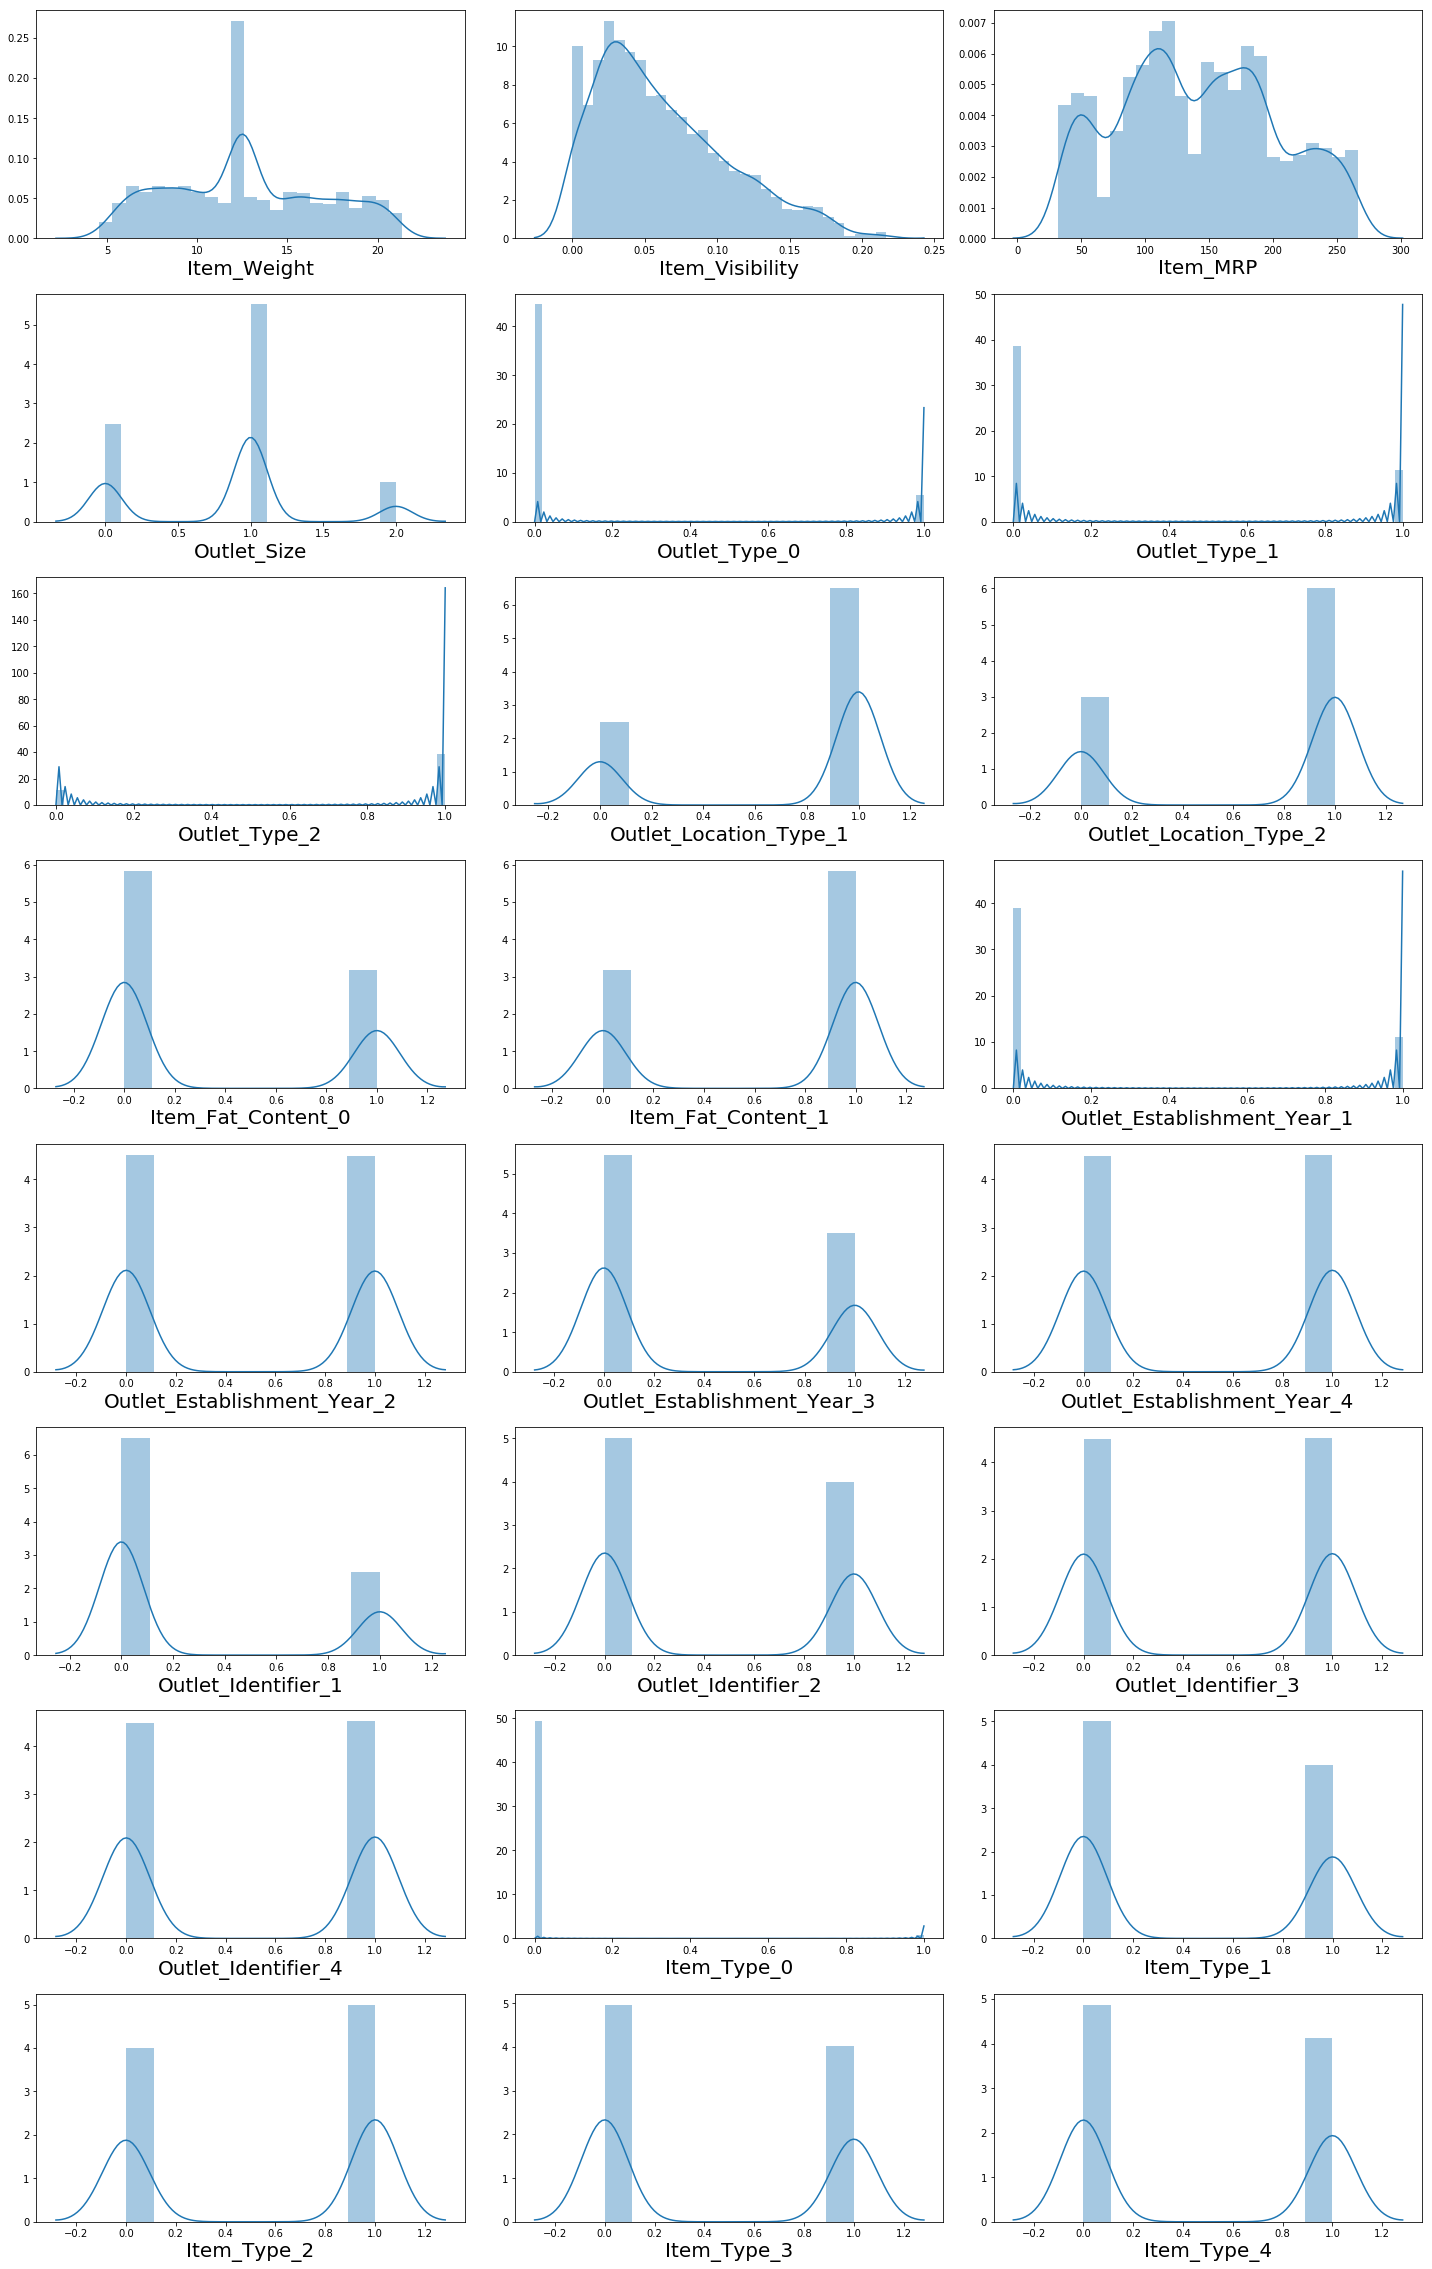

In [76]:
plt.figure(figsize = (20,35))
pltnum = 1

for i in ts_new:
    if pltnum <= 27:
        plt.subplot(9,3,pltnum)
        sns.distplot(ts_new[i])
        plt.xlabel(i,fontsize = 20)
    pltnum+=1
plt.tight_layout()

In [77]:
ts_new.skew()

Item_Weight                    0.163767
Item_Visibility                0.787861
Item_MRP                       0.133061
Outlet_Size                    0.082542
Outlet_Type_0                  2.487740
Outlet_Type_1                  1.311339
Outlet_Type_2                 -1.318685
Outlet_Location_Type_1        -0.999072
Outlet_Location_Type_2        -0.716410
Item_Fat_Content_0             0.616007
Item_Fat_Content_1            -0.616007
Outlet_Establishment_Year_1    1.340952
Outlet_Establishment_Year_2    0.007145
Outlet_Establishment_Year_3    0.449633
Outlet_Establishment_Year_4   -0.007859
Outlet_Identifier_1            0.998075
Outlet_Identifier_2            0.229412
Outlet_Identifier_3           -0.004287
Outlet_Identifier_4           -0.008574
Item_Type_0                    8.468687
Item_Type_1                    0.224314
Item_Type_2                   -0.223586
Item_Type_3                    0.210497
Item_Type_4                    0.166331
dtype: float64

In [78]:
tr_ts_data = power_transform(ts_new, method = 'yeo-johnson')
x_test = pd.DataFrame(tr_ts_data, columns = ts_new.columns)

In [79]:
x_test = x_test.drop(columns = ['Item_Weight','Item_Type_0','Outlet_Establishment_Year_4','Item_Type_1','Item_Fat_Content_1','Item_Fat_Content_0'])

In [80]:
fnl_pred = lin.predict(x_test)